<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/Ayam%20Rendang/Ass5PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

Group Members :

*   NURUL WAHIEDA BINTI MUHAMMAD FARID SELLEKUMAR (MCS231022)
*   THANEATHARRAN A/L SANTHARASEKARAN (MSC232006)
*   RANJEET A/L THIAGARAJAN (MCS231015)
*   LINGGESH A/L TAMILMANI (MCS232005)

Dataset : Predict Diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and KidneyDiseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Description

Pregnancies-To express the Number of pregnancies

Glucose	- To express the Glucose level in blood

BloodPressure	-To express the Blood pressure measurement

SkinThickness-	To express the thickness of the skin

Insulin-	To express the Insulin level in blood

BMI	-To express the Body mass index

DiabetesPedigreeFunction	-To express the Diabetes percentage

Age	-To express the age

Outcome-	To express the final result 1 is Yes and 0 is No

**PyCaret** is an open-source, low-code machine learning library in Python designed to simplify and accelerate the end-to-end machine learning workflow. It's particularly useful for beginners, as it automates many of the complex tasks involved in the machine learning process, allowing users to focus on experimenting with different models and tuning hyperparameters.

**Key features of PyCaret include:**

**Automated Setup**: PyCaret automates the process of setting up a machine learning experiment. It handles tasks such as data preprocessing, missing value imputation, feature engineering, and data partitioning into training and testing sets.

**Model Comparison**: PyCaret provides a simple interface to compare multiple machine learning models on a given dataset. It generates a table of performance metrics for each model, making it easy to identify the top-performing algorithms.

**Model Training:** With PyCaret, you can create and train machine learning models with just a single line of code. It supports a wide range of classification, regression, clustering, and anomaly detection algorithms.

**Hyperparameter Tuning:** The library includes functionality for hyperparameter tuning to improve the performance of machine learning models. It uses techniques such as grid search and randomized search to find optimal hyperparameter values.

**Model Interpretability:** PyCaret includes tools for model interpretation and visualization, helping users understand the importance of different features and making it easier to communicate results.

**Deployment:** Once a model is trained and tuned, PyCaret provides a simple way to deploy the model as a REST API or in popular cloud platforms, making it accessible for making predictions on new data.




# **Loading the Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data set - diabetes - vid - csv.csv to data set - diabetes - vid - csv (1).csv


In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('data set - diabetes - vid - csv.csv').head(3000)

# **Exploratory Data Analysis (EDA)**

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


In [6]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


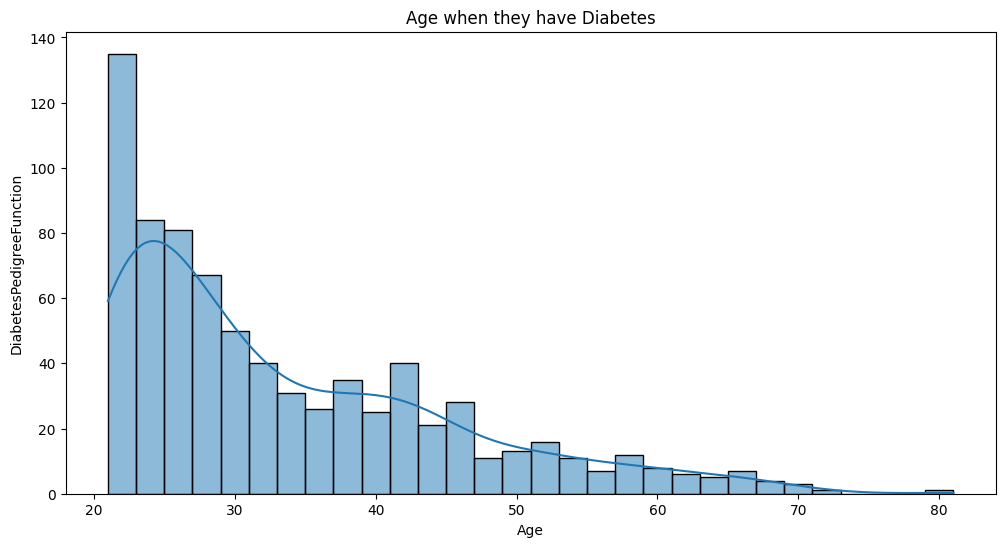

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age when they have Diabetes')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

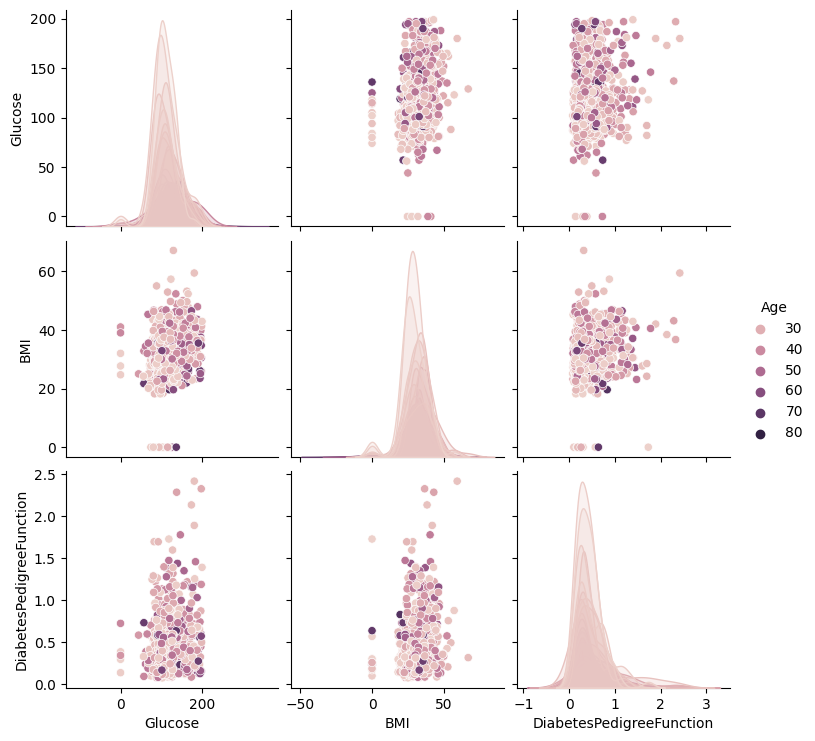

In [ ]:
sns.pairplot(df, vars=['Glucose', 'BMI', 'DiabetesPedigreeFunction'], hue='Age')
plt.show()

<ipython-input-18-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


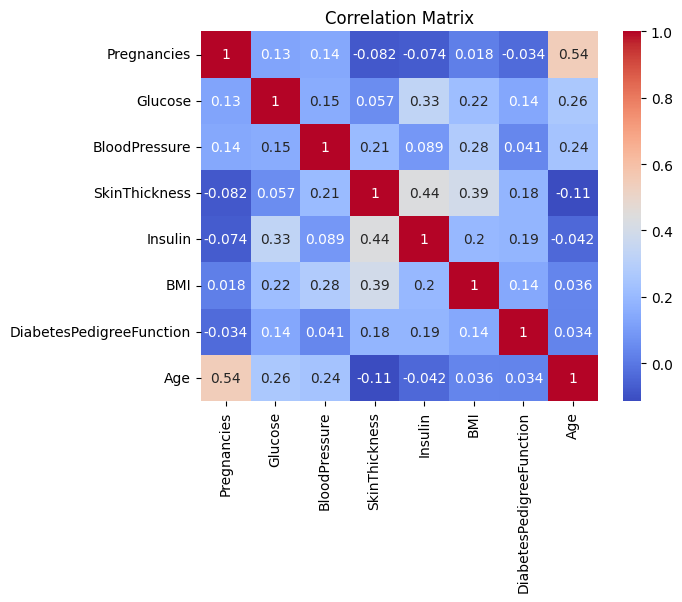

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Outcome': ['dead' 'alive']


# **Feature Engineering with Automated Tools AutoML:PyCaret**

In [9]:
!pip install pycaret

In [11]:
from pycaret.classification import *

In [12]:
uploaded = files.upload()


Saving data set - diabetes - vid - csv.csv to data set - diabetes - vid - csv (2).csv


In [13]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [16]:
xp = setup(data=df, target='Outcome')

,Description,Value
0,Session id,953
1,Target,Outcome
2,Target type,Binary
3,Target mapping,"alive: 0, dead: 1"
4,Original data shape,"(768, 9)"
5,Transformed data shape,"(768, 9)"
6,Transformed train set shape,"(537, 9)"
7,Transformed test set shape,"(231, 9)"
8,Numeric features,8
9,Preprocess,True


In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7857,0.8302,0.7857,0.7837,0.7769,0.4997,0.5112,0.0320
ridge,Ridge Classifier,0.7802,0.0000,0.7802,0.7787,0.7702,0.4840,0.4977,0.0600
lr,Logistic Regression,0.7765,0.8267,0.7765,0.7749,0.7668,0.4769,0.4899,0.7530
nb,Naive Bayes,0.7690,0.8085,0.7690,0.7689,0.7669,0.4838,0.4872,0.0570
rf,Random Forest Classifier,0.7580,0.8284,0.7580,0.7568,0.7507,0.4460,0.4547,0.2280
et,Extra Trees Classifier,0.7523,0.8135,0.7523,0.7495,0.7440,0.4287,0.4380,0.1910
xgboost,Extreme Gradient Boosting,0.7523,0.8001,0.7523,0.7513,0.7482,0.4414,0.4465,0.0850
qda,Quadratic Discriminant Analysis,0.7505,0.8077,0.7505,0.7507,0.7469,0.4405,0.4456,0.0340
lightgbm,Light Gradient Boosting Machine,0.7487,0.8172,0.7487,0.7477,0.7446,0.4335,0.4389,0.5430
gbc,Gradient Boosting Classifier,0.7485,0.8249,0.7485,0.7461,0.7425,0.4275,0.4337,0.1380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.7880,0.8333,0.8363,0.8263,0.6112,0.6260
1,0.7778,0.7789,0.7778,0.7732,0.7707,0.4882,0.4954
2,0.7593,0.8647,0.7593,0.7577,0.7430,0.4236,0.4456
3,0.8519,0.9008,0.8519,0.8623,0.8438,0.6499,0.6736
4,0.7963,0.8887,0.7963,0.7926,0.7918,0.5367,0.5410
5,0.7963,0.7759,0.7963,0.7942,0.7950,0.5479,0.5484
6,0.7407,0.8165,0.7407,0.7382,0.7195,0.3710,0.3976
7,0.6981,0.7444,0.6981,0.6813,0.6798,0.2677,0.2784
8,0.7736,0.8429,0.7736,0.7736,0.7736,0.4952,0.4952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.7940,0.8519,0.8623,0.8438,0.6499,0.6736
1,0.7222,0.7835,0.7222,0.7145,0.7160,0.3682,0.3711
2,0.7593,0.8481,0.7593,0.7676,0.7356,0.4081,0.4474
3,0.8519,0.8842,0.8519,0.8534,0.8471,0.6588,0.6686
4,0.7778,0.8692,0.7778,0.7732,0.7707,0.4882,0.4954
5,0.7407,0.7504,0.7407,0.7357,0.7371,0.4176,0.4190
6,0.7037,0.7699,0.7037,0.6912,0.6794,0.2812,0.3013
7,0.6981,0.7238,0.6981,0.6813,0.6798,0.2677,0.2784
8,0.7925,0.8667,0.7925,0.7956,0.7938,0.5435,0.5439


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Visualization**

In [24]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/ass4/bdm/Ayam%20Rendang/data%20set%20-%20diabetes%20-%20vid%20-%20csv.csv"
df = pd.read_csv(url)

# Assume we want to create a new feature 'Avg_Age_Pregnancies' by averaging 'Age' and 'Pregnancies'
# You can modify this based on your domain knowledge

# Check for missing values in the columns involved
print("Missing values before feature creation:")
print(df[['Age', 'Pregnancies']].isnull().sum())

# Fill missing values with the mean of each column
df[['Age', 'Pregnancies']] = df[['Age', 'Pregnancies']].fillna(df[['Age', 'Pregnancies']].mean())

# Create the new feature
df['Avg_Age_Pregnancies'] = (df['Age'] + df['Pregnancies']) / 2

# Check for missing values after feature creation
print("\nMissing values after feature creation:")
print(df['Avg_Age_Pregnancies'].isnull().sum())

# Display the first few rows of the dataframe with the new feature
df.head()


Missing values before feature creation:
Age            0
Pregnancies    0
dtype: int64

Missing values after feature creation:
0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Avg_Age_Pregnancies
0,6,148,72,35,0,33.6,0.627,50,dead,28.0
1,1,85,66,29,0,26.6,0.351,31,alive,16.0
2,8,183,64,0,0,23.3,0.672,32,dead,20.0
3,1,89,66,23,94,28.1,0.167,21,alive,11.0
4,0,137,40,35,168,43.1,2.288,33,dead,16.5


In [27]:
# One-hot encoding (if applicable)
df_encoded = pd.get_dummies(df, columns=['Outcome'])
df_encoded


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Avg_Age_Pregnancies,Outcome_alive,Outcome_dead
0,6,148,72,35,0,33.6,0.627,50,28.0,0,1
1,1,85,66,29,0,26.6,0.351,31,16.0,1,0
2,8,183,64,0,0,23.3,0.672,32,20.0,0,1
3,1,89,66,23,94,28.1,0.167,21,11.0,1,0
4,0,137,40,35,168,43.1,2.288,33,16.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,36.5,1,0
764,2,122,70,27,0,36.8,0.340,27,14.5,1,0
765,5,121,72,23,112,26.2,0.245,30,17.5,1,0
766,1,126,60,0,0,30.1,0.349,47,24.0,0,1


In [28]:
df_encoded[["Outcome_alive","Outcome_dead","Glucose","Insulin"]].corr()

,Outcome_alive,Outcome_dead,Glucose,Insulin
Outcome_alive,1.000000,-1.000000,-0.466581,-0.130548
Outcome_dead,-1.000000,1.000000,0.466581,0.130548
Glucose,-0.466581,0.466581,1.000000,0.331357
Insulin,-0.130548,0.130548,0.331357,1.000000


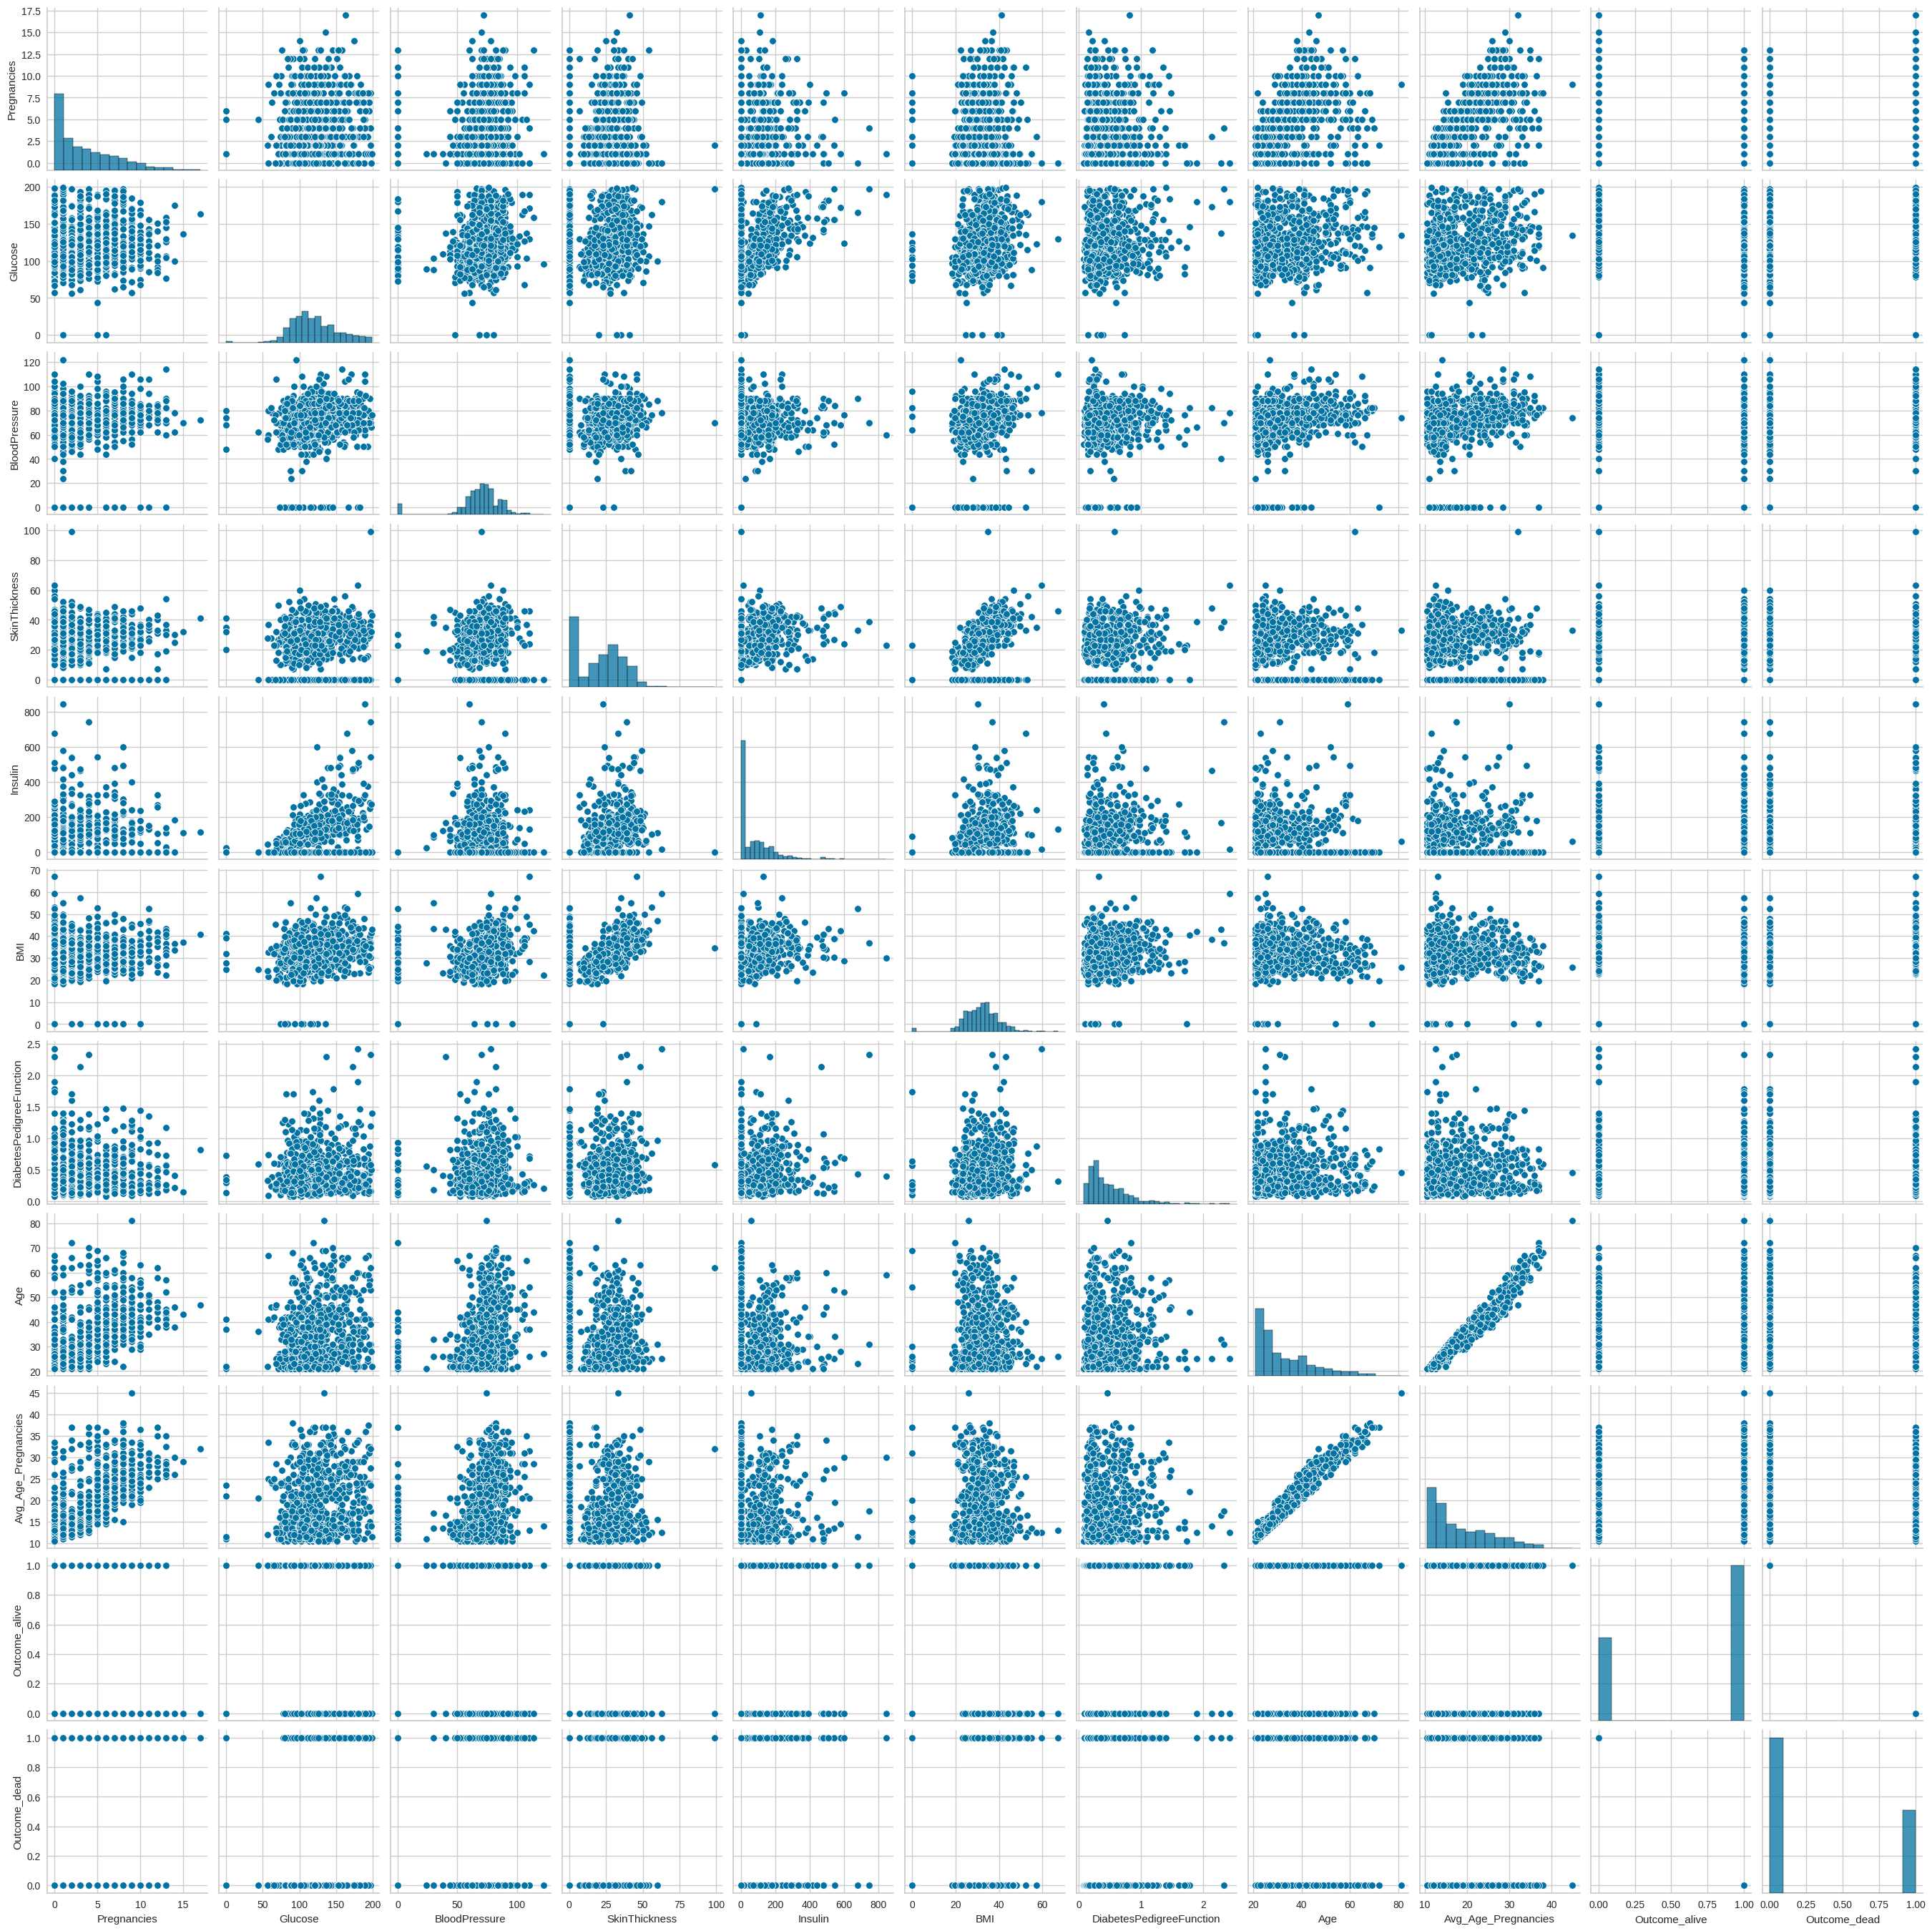

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions and relationships
sns.pairplot(df_encoded)
plt.show()

Conclusion

As the conclusion, we can see that this dataset is using the Feature Engineering with Automated Tools which is AutoML tools PyCaret. We can conclude that using this tools, we know that Linear Discriminant Analysis is the best models to predict this datasets compare with other models such as Random Forest Classifier, Naives Bayes or Logistic Regression. We can also compare and study the different type of plot at evaluate model such as Treshold,Pipelines Plot and many more as you can see in the table above.